1921.033485856206
1338.1076016520994
788.2693490065564
592.8779292654726
613.2824392056042
476.11875167635293
462.92635582483746
476.118751676353
419.58848581886537


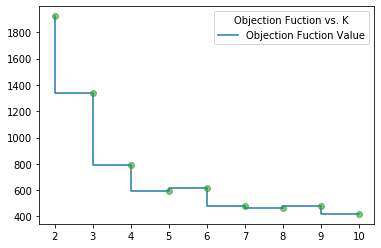

In [3]:
import scipy.io as scio
import numpy as np
import math as m
import random
import sys
import matplotlib.pyplot as plt

dataFile = 'AllSamples.mat'
data = scio.loadmat(dataFile)  # extra data from .mat file
sorted(data.keys())
dataset = data['AllSamples']

# calculate the distance between two points.
def CalDist (vecA, vecB):
    return m.sqrt(sum((vecA - vecB) ** 2))

# choose random centeroids by totally random
def RandCenter_s1 (dataset, k):
    n = dataset.shape[1]
    centroids = np.zeros((k,n))
    i = 0;
    while(i < k):
        centroids[i][0] = dataset[random.randint(0,dataset.shape[0])-1][0]
        centroids[i][1] = dataset[random.randint(0,dataset.shape[0])-1][1]
        i = i + 1
    return centroids

# choose first ramdom centeroids, then use the averge distance to choose the following points
def RandCenter_s2 (dataset, k):
    n = dataset.shape[1]
    centroids = np.zeros((k,n))
    centroids[0][0] = dataset[random.randint(0,300)][0]
    centroids[0][1] = dataset[random.randint(0,300)][1]
    
    j = 1
    while(j < k):
        #print(j)
        maxdist = -10000;
        #centroids[j,:] = dataset[MaxDist(dataset, centroids, j-1),:]
        for p in range(300):
            Sum = 0;
            for h in range(0,j):
                Sum = Sum + CalDist(dataset[p],centroids[h])

            averagedist = Sum / j # Calculate averge distance of all previous center
            #print(averagedist)
            if averagedist > maxdist:
                maxdist = averagedist # Find maxium distance
                index = p
        centroids[j,:] = dataset[index,:]
        j = j + 1
    return centroids

#RandCenter_s2(dataset, 10)

# Main function of Kmeans algorithms
def kmeans(dataset, centroids, k):
    #centroids = RandCenter_s1(dataset, k)
    #print(centroids)
    DivideCluster = np.zeros((dataset.shape[0], 2)) # Store the cluster result of each round of irteration
    ClusterChanged = True
    while ClusterChanged:
        ClusterChanged = False
        for i in range(dataset.shape[0]):
            minDist = sys.maxsize
            minIndex = 0;
            for j in range(k):
                distance = CalDist(centroids[j], dataset[i]) # calculate the distance between points and current centorids
                if distance < minDist:
                    minDist = distance # Find the miniunm distance of the cluster
                    minIndex = j
            if DivideCluster[i,0] != minIndex:
                ClusterChanged = True # When the clusters of points change, means we have to another iteration
                DivideCluster[i,:] = minIndex, minDist
                
        # Update the centeroid based on means of the points in cluster
        for j in range(k):
            points = dataset[np.nonzero(DivideCluster[:,0] == j)[0]]
            #print(points[0][0])
            #print(np.sum(CalDist(centroids[k], points)))
            centroids[j, :] = np.mean(points, axis = 0)
        
    return centroids, DivideCluster

def showCluster(dataset, k):
    numSamples, dim = dataset.shape
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    # draw all samples
    plt.rcParams['figure.figsize'] = (16,9)
    for i in range(numSamples):
        markIndex = int(DivideCluster[i, 0])
        plt.plot(dataset[i, 0], dataset[i, 1], mark[markIndex])
        
    #mark = ['or', 'ob', 'og', 'ok']
	# draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], '*', markersize = 24)

    plt.show()

def ObjectionFct(centroids, DivideCluster, k):
#     obj = 0;
#     for n in range(k):
#         return np.sum(dataset[np.nonzero(DivideCluster[:,0] == n)[0]])

#     obj = 0;
#     Sum = 0;
#     for n in range(k):
#         obj =  obj + np.sum(DivideCluster[np.nonzero(DivideCluster[:,0] == n),:])
#     #print(obj)
#     return obj
    Sum = 0
    for n in range(k):
        count = 0
        obj = 0
        #print(centroids[n])
        for p in DivideCluster:
            if p[0] == n:
                #print(p[0])
                obj = obj + CalDist(centroids[n], dataset[count]) ** 2
            count = count + 1
        Sum = Sum  + obj
    return Sum


res = [0] * 9
for k in range(2,11):
    centroids = RandCenter_s2(dataset, k)
    #print(centroids)
    centroids, DivideCluster = kmeans(dataset, centroids, k)
    #print(centroids)
    #print(DivideCluster)
    #showCluster(dataset,k)
    res[k-2] = ObjectionFct(centroids,DivideCluster, k)
    print (ObjectionFct(centroids,DivideCluster, k))
#print(DivideCluster)

res
x = range(2,11)
y = res

plt.step(x, y, label='Objection Fuction Value')
plt.plot(x, y, 'C2o', alpha=0.6)

plt.legend(title='Objection Fuction vs. K')
plt.show()

# ax.legend()
plt.show()

In [26]:
# k = 5
# centroids = RandCenter_s1(dataset, k)
# #showCluster(dataset,5)
# centroids, DivideCluster = kmeans(dataset, centroids, k)
# #print(DivideCluster)
# ObjectionFct(centroids, DivideCluster, k)
# #showCluster(dataset,5)